In [1]:
#importation de package
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter

import numpy as np
import matplotlib.pyplot as plt

In [2]:
with MPRester("RPlDkSQDkfldGfeTdTo") as m:

# Bandstructure for material id
    bs = m.get_bandstructure_by_material_id("mp-6980")

### Bande interdite du ScCuS2

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

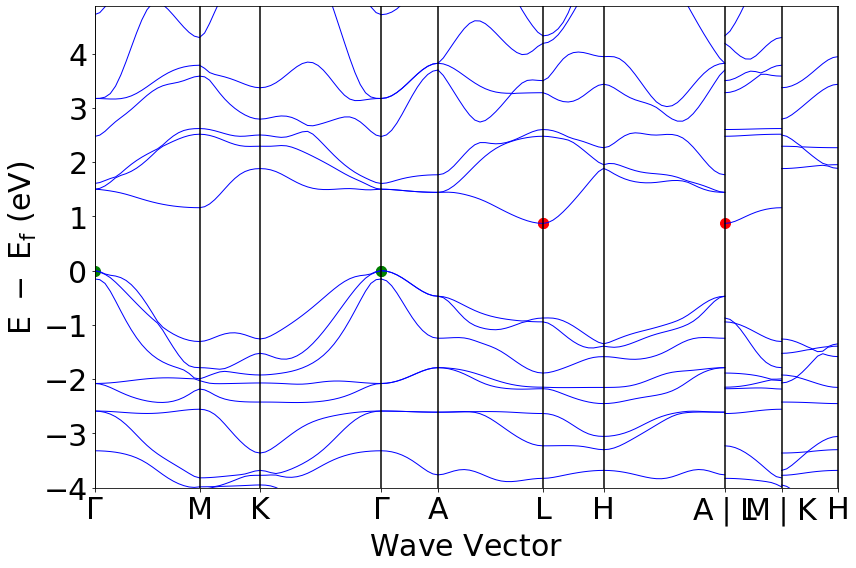

In [3]:
plot = BSPlotter(bs)
plot.get_plot(vbm_cbm_marker=True)

In [4]:
bi = bs.get_band_gap()

print('La bande interdite = ', bi.get('energy'),' eV')

La bande interdite =  0.8709999999999996  eV


In [5]:
#max de la bande de valence
vbm = bs.get_vbm()
print('---------- vbm ----------')
print(vbm.get('band_index'))
print('Les bandes 18 et 19 contiennent la plus grande énergie de la bande de valence')
print('')

#max de la bande de conduction
cbm = bs.get_cbm()
print('---------- cbm ----------')
print(cbm.get('band_index'))
print('La 20e bande contient la plus basse énergie de la bande de conduction')

---------- vbm ----------
defaultdict(<class 'list'>, {<Spin.up: 1>: [18, 19]})
Les bandes 18 et 19 contiennent la plus grande énergie de la bande de valence

---------- cbm ----------
defaultdict(<class 'list'>, {<Spin.up: 1>: [20]})
La 20e bande contient la plus basse énergie de la bande de conduction


### Direction de dispersion

Afin de calculer les directions de dispersion de la dernière bande de valence et de la première bande de conduction,
il faut déterminer les pentes maximales et minimales repsectivement de chaque branche pour ces bandes.
Une pente maximale correspondra à un maximum de dispersion et inversément.

In [6]:
data = plot.bs_plot_data()
x = data.get('ticks').get('distance')
y = data.get('energy')

In [7]:
x_ord = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[14], x[15]])

In [8]:
#Distance entre chaque point
dx = x_ord[1:] - x_ord[0:-1]

# Pour la dernière bande de valence (n°19), on calcul la pente entre chaque branche :
ValSlope = np.zeros(np.shape(dx))
for i in range(np.size(dx)):
    ValSlope[i] = ((y[i].get('1')[19][-1]) - (y[i].get('1')[19][0]))/dx[i]

# Pour la première bande de conduction (n°20), on calcul la pente entre chaque branche :
ConduSlope = np.zeros(np.shape(dx))
for i in range(np.size(dx)):
    ConduSlope[i] = ((y[i].get('1')[20][-1]) - (y[i].get('1')[20][0]))/dx[i]

In [9]:
#Pente maximum
MaxVal = np.max(np.abs(ValSlope))
MaxCondu = np.max(np.abs(ConduSlope))
#Pente minimum
MinVal = np.min(np.abs(ValSlope))
MinCondu = np.min(np.abs(ConduSlope))

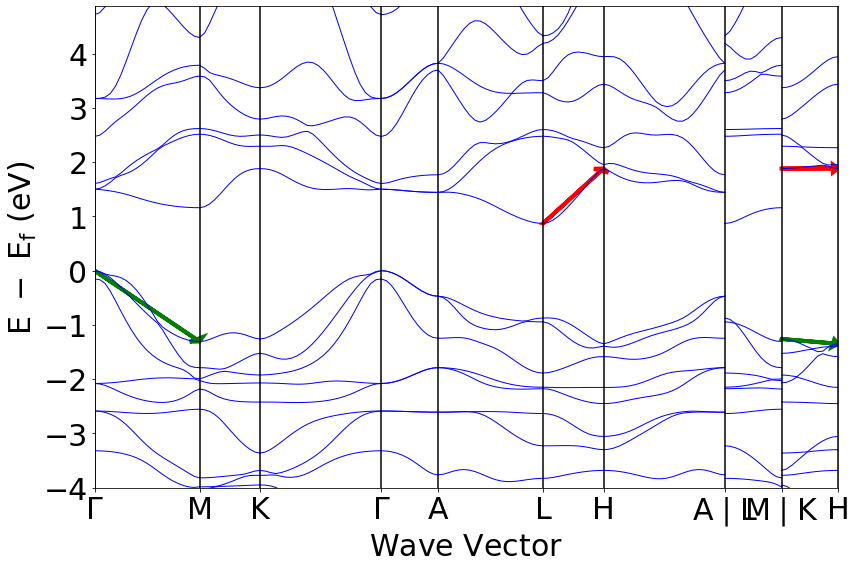

In [10]:
plot.get_plot()
#Flèche représentant la pente maximum de la dernière bande de valence
plt.arrow(x[0],(y[0].get('1')[19][0]),dx[0],(y[0].get('1')[19][-1]) - (y[0].get('1')[19][0]), color='g', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente minimum de la dernière bande de valence
plt.arrow(x[14],(y[8].get('1')[19][0]),dx[8],(y[8].get('1')[19][-1]) - (y[8].get('1')[19][0]), color='g', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente maximum de la première bande de conduction
plt.arrow(x[10],(y[5].get('1')[20][0]),dx[5],(y[5].get('1')[20][-1]) - (y[5].get('1')[20][0]), color='r', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
#Flèche représentant la pente minimum de la prmière bande de conduction
plt.arrow(x[14],(y[8].get('1')[20][0]),dx[8],(y[8].get('1')[20][-1]) - (y[8].get('1')[20][0]), color='r', head_width=0.15, head_length=0.05, linewidth=4, length_includes_head=True)
plt.show()

In [11]:
print("La dernière bande de valence :")
print("-présente le plus de dispertion dans la branche: \u0393 - M, ", 'valeur absolue de la pente =', MaxVal)
print("La direction de dispersion maximale de cette bande est donc la direction \u0393 - M")
print("-présente le moins de dispertion dans la branche: M|K - H, ", 'valeur absolue de la pente =', MinVal)
print("La direction de dispersion minimale de cette bande est donc la direction M|K - H")
print(" ")
print("La première bande de conduction :")
print("-présente le plus de dispertion dans la branche: L - H, ", 'valeur absolue de la pente =', MaxCondu)
print("La direction de dispersion maximale de cette bande est donc la direction L - H")
print("-présente le moins de dispertion dans la branche: M|K - H, ", 'valeur absolue de la pente =', MinCondu)
print("La direction de dispersion minimale de cette bande est donc la direction M|K - H")

La dernière bande de valence :
-présente le plus de dispertion dans la branche: Γ - M,  valeur absolue de la pente = 1.3500447673214633
La direction de dispersion maximale de cette bande est donc la direction Γ - M
-présente le moins de dispertion dans la branche: M|K - H,  valeur absolue de la pente = 0.08399850108195635
La direction de dispersion minimale de cette bande est donc la direction M|K - H
 
La première bande de conduction :
-présente le plus de dispertion dans la branche: L - H,  valeur absolue de la pente = 1.816624299518727
La direction de dispersion maximale de cette bande est donc la direction L - H
-présente le moins de dispertion dans la branche: M|K - H,  valeur absolue de la pente = 0.006892027957620993
La direction de dispersion minimale de cette bande est donc la direction M|K - H


### Masse effective

Pour le calcul de la masse effective nous avonc la formule suivante,

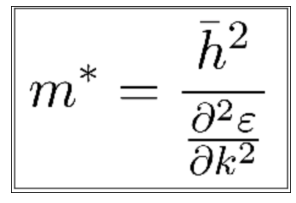

où h_barre =  1.0545718176461565e-34 [J*s]


In [12]:
import matplotlib.image as img
import scipy.constants as sc

Masse_effective = img.imread('Masse_effective.png')
fig, axes = plt.subplots(figsize=(5,5))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(Masse_effective)
plt.show()
print('où h_barre = ',sc.hbar,'[J*s]')

Le terme du dénominateur est donné par la dérivée seconde de l'approximation parabolique de la dispersion.
Il nous faut donc calculé cette parabole afin d'en extraire sa dérivée.

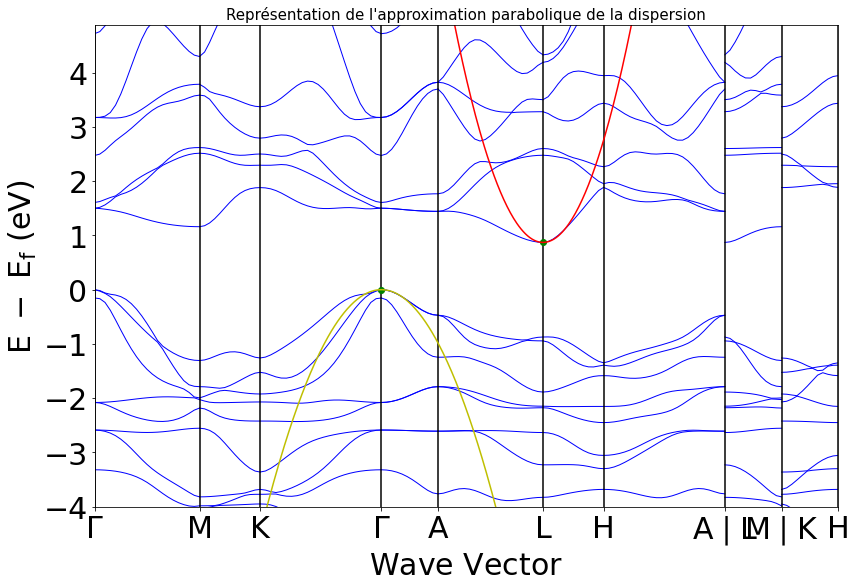

In [13]:
#Approximation parabolique

#Equation courbe bande de conduction

#pC(k) = a(k-b)^2 + c
[x1,y1] = [data.get('distances')[5][0],data.get('energy')[5].get('1')[20][0]] #max de la parabole
[x2,y2] = [data.get('distances')[5][-1],data.get('energy')[5].get('1')[20][-1]] #autre point de la parabole

a = y2/((x2-x1)**2)
b = x1
c = y1

def pC(k):
    return a*((k-b)**2) + c
    
kC = np.arange(0,10,0.01)
eC = pC(kC)

#Equation courbe bande de valence

#pV(k) = d(k-e)^2 + f
[x3,y3] = [data.get('distances')[3][0],data.get('energy')[3].get('1')[19][0]] #max de la parabole
[x4,y4] = [data.get('distances')[3][4],data.get('energy')[3].get('1')[19][4]] #autre point de la parabole

d = y4/((x4-x3)**2)
e = x3
f = y3

def pV(k):
    return d*((k-e)**2) + f
    
kV = np.arange(0,10,0.01)
eV = pV(kV)


plot.get_plot()
plt.title('Représentation de l\'approximation parabolique de la dispersion', fontsize=15)
plt.plot(x3,y3,'go')
plt.plot(kV,eV,'y')
plt.plot(x1,y1,'go')
plt.plot(kC,eC,'r')

On a donc les 2 équations des paraboles passant par le maximum de la bande de valence et le minimum de la bande de conduction.
Les équations étant de la forme y(x) = a*x^2+b*x+c leurs dérivées secondes sont de la forme y''(x) = 2*a 

In [14]:
print('Pour la bande de valence, nous avons', 'e_V(k) =', d,'* (k -',e,')² + ',f )
print('On a donc e_V\'\'(k) =', 2*d,'[eV*A²]')
print('Avec A en Angtrom, A =',sc.angstrom,'[m], et eV en electron volt, eV =',sc.e,'[J]')
d1 = d*(sc.angstrom)**2*(sc.e)
print('On a donc e_V\'\'(k) =', d1,'[J*m²]')
masse_V = ((sc.hbar)**2)/(2*d1)

print('La masse effective est donc, m* = ', abs(masse_V), '[kg]')

print('')

print('Pour la bande de conduction, nous avons', 'e_C(k) =', a,'* (k -',b,')² + ',c )
print('On a donc e_C\'\'(k) =', 2*a,'[eV*A²]')
print('Avec A en Angtrom, A =',sc.angstrom,'[m], et eV en electron volt, eV =',sc.e,'[J]')
a1 = a*(sc.angstrom)**2*(sc.e)
print('On a donc e_C\'\'(k) =', a1,'[J*m²]')
masse_C = ((sc.hbar)**2)/(2*a1)

print('La masse effective est donc, m* = ', abs(masse_C), '[kg]')

Pour la bande de valence, nous avons e_V(k) = -3.603278315548905 * (k - 2.642109060446388 )² +  0.0
On a donc e_V''(k) = -7.20655663109781 [eV*A²]
Avec A en Angtrom, A = 1e-10 [m], et eV en electron volt, eV = 1.602176634e-19 [J]
On a donc e_V''(k) = -5.773088322971335e-39 [J*m²]
La masse effective est donc, m* =  9.631947896486741e-31 [kg]

Pour la bande de conduction, nous avons e_C(k) = 6.047527539574858 * (k - 4.131530730903374 )² +  0.8709999999999996
On a donc e_C''(k) = 12.095055079149716 [eV*A²]
Avec A en Angtrom, A = 1e-10 [m], et eV en electron volt, eV = 1.602176634e-19 [J]
On a donc e_C''(k) = 9.689207317378348e-39 [J*m²]
La masse effective est donc, m* =  5.7389716317600166e-31 [kg]
